<a href="https://colab.research.google.com/github/fetle1/coursera/blob/main/Cervical_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import resample
import shutil
import numpy as np

# Set directories
data_dir = '/content/drive/MyDrive/Training'  # Your image directory
augmented_dir = '/content/drive/MyDrive/augmented_datag'  # Directory to save augmented data

# Check class distribution
classes = os.listdir(data_dir)
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print("Initial Class Distribution:", class_counts)

# Step 1: Oversample LSIL and HSIL to match the number of images in Normal (229 images)
target_count = class_counts['Normal']  # 229 images for all classes

# Create directories for the augmented data if they don't exist
for cls in classes:
    class_augmented_dir = os.path.join(augmented_dir, cls)
    if not os.path.exists(class_augmented_dir):
        os.makedirs(class_augmented_dir)

# Oversample minority classes (LSIL and HSIL) to have 229 images
for cls in classes:
    images = os.listdir(os.path.join(data_dir, cls))
    class_dir = os.path.join(data_dir, cls)
    class_augmented_dir = os.path.join(augmented_dir, cls)

    # Oversample LSIL and HSIL
    if class_counts[cls] < target_count:
        images_to_augment = resample(images, n_samples=target_count, replace=True)

        # Copy oversampled images to the augmented directory
        for img_name in images_to_augment:
            original_image_path = os.path.join(class_dir, img_name)
            shutil.copy(original_image_path, class_augmented_dir)
    else:
        # For Normal class, just copy the images
        for img_name in images:
            original_image_path = os.path.join(class_dir, img_name)
            shutil.copy(original_image_path, class_augmented_dir)

# Check new distribution after oversampling
balanced_class_counts = {cls: len(os.listdir(os.path.join(augmented_dir, cls))) for cls in classes}
print("Class Distribution after oversampling:", balanced_class_counts)

# Step 2: Augment all classes using 5 different augmentation techniques to reach at least 1300 images per class
augmentation_techniques = [
    ImageDataGenerator(rotation_range=20),
    ImageDataGenerator(width_shift_range=0.2),
    ImageDataGenerator(height_shift_range=0.2),
    ImageDataGenerator(shear_range=0.2),
    ImageDataGenerator(zoom_range=0.2)
]

# Target total images after augmentation (1300 for each class)
target_augmented_count = 1300

# Augment all classes
for cls in classes:
    target_augmented_dir = os.path.join(augmented_dir, cls)
    current_count = len(os.listdir(target_augmented_dir))
    images_needed = target_augmented_count - current_count
    images_to_augment = os.listdir(target_augmented_dir)

    images_augmented = 0
    technique_idx = 0

    while images_augmented < images_needed:
        for img_name in images_to_augment:
            img = tf.keras.preprocessing.image.load_img(os.path.join(target_augmented_dir, img_name))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            # Apply each of the 5 augmentation techniques
            datagen = augmentation_techniques[technique_idx]
            aug_iter = datagen.flow(img_array, batch_size=1, save_to_dir=target_augmented_dir,
                                    save_prefix=f'{cls}_aug', save_format='jpg')

            # Generate and save one new augmented image per original image
            next(aug_iter)
            images_augmented += 1

            # Stop if the target count is reached
            if images_augmented >= images_needed:
                break

        # Rotate through the augmentation techniques
        technique_idx = (technique_idx + 1) % len(augmentation_techniques)

print("Final Augmentation completed.")


Initial Class Distribution: {'Normal': 229, 'LSIL': 38, 'HSIL': 154}
Class Distribution after oversampling: {'Normal': 1238, 'LSIL': 1283, 'HSIL': 1292}
Final Augmentation completed.


In [ ]:
import os

# Set the augmented directory
augmented_dir = '/content/drive/MyDrive/augmented_datag'

# Get the list of classes (subdirectories) in the augmented folder
classes_augmented = os.listdir(augmented_dir)

# Count the number of images in each class folder
augmented_class_counts = {cls: len(os.listdir(os.path.join(augmented_dir, cls))) for cls in classes_augmented}

# Print the counts for each class
print("Image count in each class after augmentation:")
for cls, count in augmented_class_counts.items():
    print(f"{cls}: {count} images")


Plotting histogram for Normal class


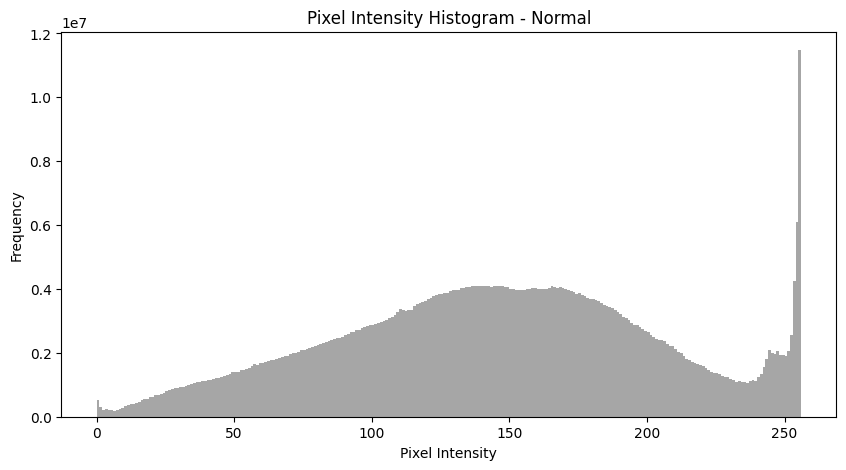

Plotting histogram for LSIL class


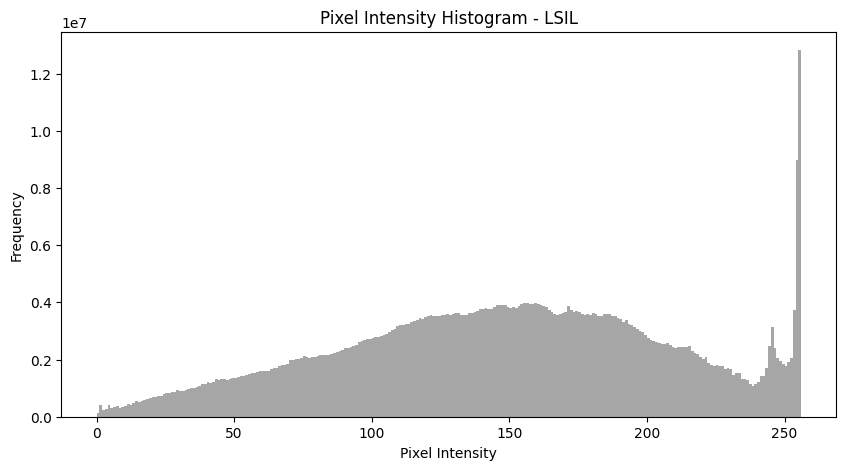

Plotting histogram for HSIL class


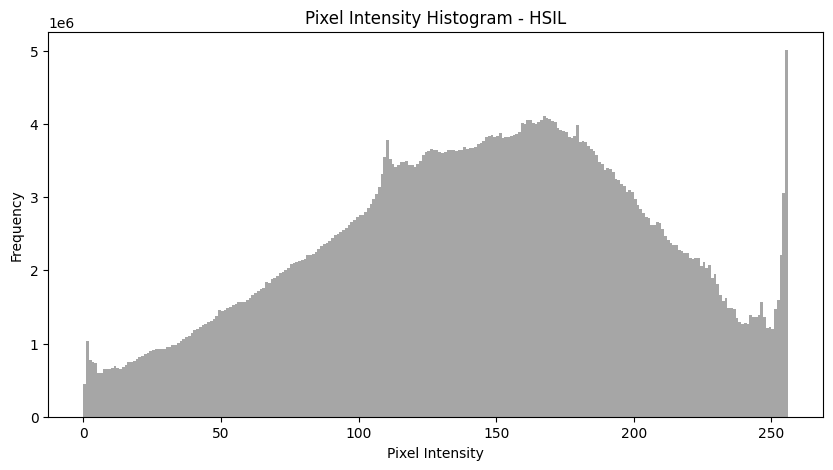

In [ ]:
import os
import cv2  # OpenCV for image processing
import matplotlib.pyplot as plt
import numpy as np

# Set directories
augmented_dir = '/content/drive/MyDrive/augmented_datag'  # Directory of augmented data

# Function to plot histograms of all images in a class
def plot_class_histograms(class_name, images_dir):
    image_files = os.listdir(images_dir)
    pixel_values = []

    for img_name in image_files:
        img_path = os.path.join(images_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

        if img is not None:
            pixel_values.append(img.flatten())  # Flatten image to a 1D array of pixel values

    # Concatenate all pixel values from all images
    all_pixels = np.concatenate(pixel_values)

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.hist(all_pixels, bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Histogram - {class_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for each class
classes = os.listdir(augmented_dir)
for cls in classes:
    print(f"Plotting histogram for {cls} class")
    class_dir = os.path.join(augmented_dir, cls)
    plot_class_histograms(cls, class_dir)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
base_model = tf.keras.applications.NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))


In [ ]:
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Choose one of the pre-trained models
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change the number of units for your number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed for reproducibility
import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Choose one of the pre-trained models
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (1, 7, 7, 1280)             │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (1, 1280)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 1024)                   │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,887,654 (22.46 MB)

 Trainable params: 1,838,083 (7.01 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 83s 468ms/step - accuracy: 0.3254 - auc: 0.4899 - loss: 1.1206 - precision: 0.2152 - recall: 0.0058 - val_accuracy: 0.0833 - val_auc: 0.2604 - val_loss: 1.1316 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
  1/121 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1562 - auc: 0.3696 - loss: 1.1357 - precision: 0.0000e+00 - recall: 0.0000e+00

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1562 - auc: 0.3696 - loss: 1.1357 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4000 - val_auc: 0.4000 - val_loss: 1.1335 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.3293 - auc: 0.4882 - loss: 1.1060 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3958 - val_auc: 0.4479 - val_loss: 1.1110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3438 - auc: 0.5942 - loss: 1.0849 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.3000 - val_auc: 0.3000 - val_loss: 1.1345 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 31s 245ms/step - accuracy: 0.3357 - auc: 0.4901 - loss: 1.1031 - precision: 0.7459 - recall: 3.4838e-04 - val_accuracy: 0.3646 - val_auc: 0.5000 - val_loss: 1.0989 - val_precision: 0.0000e+00 -

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed for reproducibility
import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


# Choose one of the pre-trained models
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (1, 7, 7, 2048)             │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (1, 2048)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (1, 1024)                   │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,212,227 (99.99 MB)

 Trainable params: 2,624,515 (10.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 62s 373ms/step - accuracy: 0.3379 - auc_7: 0.5076 - loss: 1.4744 - precision_7: 0.3427 - recall_7: 0.1695 - val_accuracy: 0.3542 - val_auc_7: 0.5015 - val_loss: 1.0976 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4375 - auc_7: 0.6248 - loss: 1.0601 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00 - val_accuracy: 0.6000 - val_auc_7: 0.7250 - val_loss: 1.0773 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 32s 251ms/step - accuracy: 0.3237 - auc_7: 0.4921 - loss: 1.1139 - precision_7: 0.4064 - recall_7: 0.0025 - val_accuracy: 0.0833 - val_auc_7: 0.3409 - val_loss: 1.1170 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.3125 - auc_7: 0.5310 - loss: 1.0937 - precision_

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'



# Choose one of the pre-trained models
base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42  # Set seed for reproducibility
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Validation data should not be shuffled
)



# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (1, 5, 5, 2048)             │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (1, 2048)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (1, 1024)                   │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,427,299 (93.18 MB)

 Trainable params: 2,624,515 (10.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 62s 339ms/step - accuracy: 0.3738 - auc_2: 0.5388 - loss: 1.8030 - precision_2: 0.3732 - recall_2: 0.2829 - val_accuracy: 0.4375 - val_auc_2: 0.6441 - val_loss: 1.0441 - val_precision_2: 0.5000 - val_recall_2: 0.0938
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4062 - auc_2: 0.6450 - loss: 1.0581 - precision_2: 0.5263 - recall_2: 0.3125 - val_accuracy: 0.7000 - val_auc_2: 0.8650 - val_loss: 0.8573 - val_precision_2: 1.0000 - val_recall_2: 0.2000
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 60s 220ms/step - accuracy: 0.5415 - auc_2: 0.7362 - loss: 0.9376 - precision_2: 0.6387 - recall_2: 0.3696 - val_accuracy: 0.4896 - val_auc_2: 0.7294 - val_loss: 0.9434 - val_precision_2: 0.5778 - val_recall_2: 0.2708
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5938 - auc_2: 0.8074 - loss: 0.8199 - precision_2: 0.6800 - recall_2: 0.5312 - v

In [ ]:
pip install --upgrade tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
tf.config.optimizer.set_jit(False)



# Choose one of the pre-trained models
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
base_model.trainable = False



# Build your model on top of the base model
model = models.Sequential([
    base_model,

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (1, 1024)                   │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 1024)                   │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,613,443 (32.86 MB)

 Trainable params: 1,575,939 (6.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
# Commenting out or removing the line below to disable deterministic ops
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'


# Choose one of the pre-trained models
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.MaxPooling2D):
        layer = tf.keras.layers.AveragePooling2D(pool_size=layer.pool_size)


# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (1, 7, 7, 1024)             │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (1, 1024)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (1, 1024)                   │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,613,443 (32.86 MB)

 Trainable params: 8,529,795 (32.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node gradient_tape/sequential_8_1/densenet121_1/pool1_1/MaxPool2d/MaxPoolGrad defined at (most recent call last):
<stack traces unavailable>
GPU MaxPool gradient ops do not yet have a deterministic XLA implementation.
	 [[{{node gradient_tape/sequential_8_1/densenet121_1/pool1_1/MaxPool2d/MaxPoolGrad}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_311215[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_iterator_313950]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Choose one of the pre-trained models
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (1, 7, 7, 512)              │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (1, 512)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (1, 1024)                   │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,766,339 (60.14 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 64s 386ms/step - accuracy: 0.3769 - auc_4: 0.5387 - loss: 1.1925 - precision_4: 0.3965 - recall_4: 0.1570 - val_accuracy: 0.4583 - val_auc_4: 0.6886 - val_loss: 1.0058 - val_precision_4: 0.5625 - val_recall_4: 0.1875
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.3750 - auc_4: 0.5884 - loss: 1.0541 - precision_4: 0.5000 - recall_4: 0.0938 - val_accuracy: 0.6000 - val_auc_4: 0.7625 - val_loss: 0.9797 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 28s 223ms/step - accuracy: 0.4856 - auc_4: 0.6663 - loss: 1.0207 - precision_4: 0.5748 - recall_4: 0.2064 - val_accuracy: 0.6458 - val_auc_4: 0.7949 - val_loss: 0.8466 - val_precision_4: 0.6250 - val_recall_4: 0.4688
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5312 - auc_4: 0.7876 - loss: 0.8933 - precision_4: 0.8125 - recall_4: 0.4

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed for reproducibility

import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# Choose one of the pre-trained models
base_model = tf.keras.applications.NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
# Change the dummy input shape to (1, 331, 331, 3) to match NASNetLarge's expected input shape
dummy_input = tf.zeros((1, 331, 331, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    # Change target_size to (331, 331) to match NASNetLarge's expected input shape
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    # Change target_size to (331, 331) to match NASNetLarge's expected input shape
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ nasnet_large (Functional)            │ (1, 11, 11, 4032)           │      84,916,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (1, 4032)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (1, 1024)                   │       4,129,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,572,949 (341.69 MB)

 Trainable params: 4,656,131 (17.76 MB)

 Non-trainable params: 84,916,818 (323.93 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.4610 - auc_5: 0.6240 - loss: 1.2462 - precision_5: 0.4817 - recall_5: 0.3611 - val_accuracy: 0.6042 - val_auc_5: 0.8183 - val_loss: 0.7969 - val_precision_5: 0.6667 - val_recall_5: 0.5208
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.6875 - auc_5: 0.8701 - loss: 0.6883 - precision_5: 0.7200 - recall_5: 0.5625 - val_accuracy: 0.4000 - val_auc_5: 0.6725 - val_loss: 1.0778 - val_precision_5: 0.4286 - val_recall_5: 0.3000
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 144s 774ms/step - accuracy: 0.7278 - auc_5: 0.8924 - loss: 0.6213 - precision_5: 0.7612 - recall_5: 0.6700 - val_accuracy: 0.6042 - val_auc_5: 0.8080 - val_loss: 0.8668 - val_precision_5: 0.6429 - val_recall_5: 0.5625
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - auc_5: 0.9517 - loss: 0.4203 - precision_5: 0.8387 - recall_5: 0.8125 - va

In [ ]:


import numpy as np
import random
import os


# Set the seed for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed for reproducibility
tf.random.set_seed(42)

# Choose one of the pre-trained models
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Build your model on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Change number of units to match your classes
])

# Compile the model with additional metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Call the model on a dummy input to build the graph and infer shapes
# This is necessary for the custom metrics to work correctly
dummy_input = tf.zeros((1, 224, 224, 3))
_ = model(dummy_input)

# Summary of the model
model.summary()

# Prepare the data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/augmented_datag',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(




    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v2 (Functional)     │ (1, 5, 5, 1536)             │      54,336,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (1, 1536)                   │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (1, 1024)                   │       1,573,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (1, 1024)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (1, 512)                    │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,436,963 (215.29 MB)

 Trainable params: 2,100,227 (8.01 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

Found 3900 images belonging to 3 classes.
Found 106 images belonging to 3 classes.
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 89s 468ms/step - accuracy: 0.3839 - auc_6: 0.5434 - loss: 1.9863 - precision_6: 0.3856 - recall_6: 0.2961 - val_accuracy: 0.5729 - val_auc_6: 0.7594 - val_loss: 0.9434 - val_precision_6: 0.6818 - val_recall_6: 0.1562
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.4062 - auc_6: 0.6067 - loss: 1.1054 - precision_6: 0.4091 - recall_6: 0.2812 - val_accuracy: 0.7000 - val_auc_6: 0.7775 - val_loss: 0.9810 - val_precision_6: 1.0000 - val_recall_6: 0.1000
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 30s 234ms/step - accuracy: 0.5086 - auc_6: 0.6945 - loss: 0.9911 - precision_6: 0.5897 - recall_6: 0.2980 - val_accuracy: 0.5521 - val_auc_6: 0.7750 - val_loss: 0.8923 - val_precision_6: 0.6842 - val_recall_6: 0.2708
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5000 - auc_6: 0.7224 - loss: 0.9615 - precision_6: 0.6000 - recall_6: 0.3750 - va

In [ ]:
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)
